# Assignment 1

### Exercise 1 (Reading and processing data).

1. Read the data from the file smoking.txt, and divide the dataset into two groups consisting of smokers and non-smokers. Write a script which computes the average lung function, measured in FEV1, among the smokers and among the non-smokers.
2. Report your computed average FEV1 scores. Are you surprised?


In [2]:
# Exercise 1
import numpy as np
data = np.loadtxt('smoking.txt')
nonsmokers = data[np.where(data[:,4] == 0)] #select all rows for nonsmokers
smokers = data[np.where(data[:,4] == 1)] #select all rows for smokers

def avg_FEV1(data):
    '''Calculates average FEV1 value for an array'''
    fev1 = data[:,1] #Select the column for fev1 values
    avg = np.mean(fev1)
    return avg

print("Average FEV1 for nonsmokers: " + str(avg_FEV1(nonsmokers)))
print("Average FEV1 for smokers: " + str(avg_FEV1(smokers)))

Average FEV1 for nonsmokers: 2.5661426146010187
Average FEV1 for smokers: 3.2768615384615383


Since FEV1 is an indicator of lung function, it is quite surprising smokers have a higher average FEV1.

### Exercise 2 (Boxplots). 
Make a box plot of the FEV1 in the two groups. What do you see? Are you surprised?

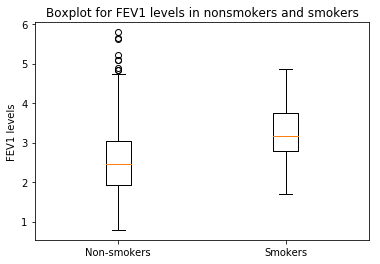

In [6]:
# Exercise 2
import matplotlib.pyplot as plt
nonsmokers_fev1 = nonsmokers[:,1] #select fev1 values from the nonsmoker array
smokers_fev1 = smokers[:,1] #select fev1 values from the smoker array
labels = ["Non-smokers", "Smokers"]
plt.boxplot([nonsmokers_fev1, smokers_fev1], labels = labels)
plt.title('Boxplot for FEV1 levels in nonsmokers and smokers')
plt.ylabel('FEV1 levels')
plt.show()

The non-smokers have a much larger range of FEV1 values and many extreme values that are larger than the Smoker FEV1 values.

### Exercise 3 (Hypothesis testing).
Next, we will perform a *hypothesis* test to investigate the difference between the FEV1 level in the two populations *smokers* and *non-smokers*.

1. Write a script that performs a two-sided t-test whose null hypothesis is that the two populations have the same mean. Use a significance level of $\alpha$ = 0.05, and return a binary response indicating acceptance or rejection of the null hypothesis. You should try do implement it by yourself - though not the CDF of the t-distribution, use scipy. If you can't, you may use scipy's stats.ttest ind.
2. Report your result and discuss it. Are you surprised?

In [5]:
# Exercise 3
'''COME BACK TO THIS LATER'''
import scipy.stats as sp

def df(sample1, sample2):
    '''Calculate the degree of freedom'''
    n1 = len(sample1)
    n2 = len(sample2)
    sd1 = np.std(sample1)
    sd2 = np.std(sample2)
    num = (sd1**2/n1 +sd2**2/n2)**2
    dem1 = sd1**4/((n1**2)*(n1-1))
    dem2 = sd2**4/((n2**2)*(n2-1))
    return num/(dem1+dem2)

def ttest(sample1, sample2, alpha = 0.05):
    '''Manually perform the t test'''
    n1 = len(sample1)
    n2 = len(sample2)
    #calculate degree of freedom
    k = df(sample1, sample2)
    mean1 = np.mean(sample1)
    mean2 = np.mean(sample2)
    sd1 = np.std(sample1)**2
    sd2 = np.std(sample2)**2
    #formula for t statistic
    tval = (mean1 - mean2)/np.sqrt( (sd1/n1) + (sd2/n2))
    #calculate p value
    pval = 2*sp.t.cdf(-abs(tval), k)
    return tval, pval, k

#Our value
res = ttest(smokers_fev1, nonsmokers_fev1)
print("T value: "+ str(res[0]))
print("P value: "+ str(res[1]))
print("Degrees of freedom: "+ str(res[2]))
#True value
sp.ttest_ind(smokers_fev1, nonsmokers_fev1, equal_var=False)

T value: 7.1990318609997095
P value: 2.422935445753947e-10
Degrees of freedom: 83.55597808814765


Ttest_indResult(statistic=7.149608129503808, pvalue=3.073812744876234e-10)

In [20]:
# Exercise 3
import scipy.stats as sp

def df(sample1, sample2):
    '''Calculate the degree of freedom'''
    n1 = len(sample1)
    n2 = len(sample2)
    var1 = np.var(sample1)
    var2 = np.var(sample2)
    num = ((var1/n1) + (var2/n2))**2
    den1 = (var1**2)/((n1-1)*n1**2)
    den2 = (var2**2)/((n2-1)*n2**2)
    df = np.floor(num/(den1+den2))
    return df

def ttest(sample1, sample2, alpha = 0.05):
    '''Returns whether the null hypothesis isrejected or not, reject = True'''
    n1 = len(sample1)
    n2 = len(sample2)
    mean1 = np.mean(sample1)
    mean2 = np.mean(sample2)
    var1 = np.var(sample1)
    var2 = np.var(sample2)
    #calculate t statistic
    tval = (mean1 - mean2)/np.sqrt((var1/n1)+(var2/n2))
    #calculate degree of freedom
    k = df(sample1, sample2)
    #calculate p value
    pval = 2*sp.t.cdf(-abs(tval), k)
    
    print("T value: "+ str(tval))
    print("P value: "+ str(pval))
    print("Degrees of freedom: "+ str(k))
    
    if pval < alpha:
        print("The null hypothesis is rejected at alpha = " + str(alpha))
        return True
    else:
        print("The null hypothesis is not rejected at alpha = " + str(alpha))
        return False

#test
ttest(smokers_fev1, nonsmokers_fev1)

T value: 7.1990318609997095
P value: 2.4945644815274697e-10
Degrees of freedom: 83.0
The null hypothesis is rejected at alpha = 0.05


True

The p value is much smaller than alpha (0.05) which indicates the difference between the two means is very statistically significant. This implies our strange results did not occur by chance so the FEV1 levels of our smoker sample is indeed higher than that of the nonsmokers.

### Exercise 4 (Correlation).
1. Compute the correlation between age and FEV1. Make a 2D plot of age versus FEV1 where non smokers appear in one color and smokers appear in another.
2. What do you see? Comment your results.

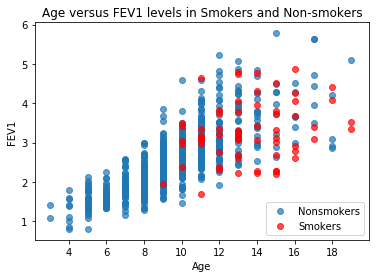

In [23]:
# Exercise 4

# Correlation
'''NOT SURE HOW TO DO THIS'''
np.correlate(data[:,0],data[:,1])

# 2D plot
nonsmokers_age = nonsmokers[:,0]
smokers_age = smokers[:,0]
plt.scatter(nonsmokers_age, nonsmokers_fev1, alpha=0.7, label='Nonsmokers')
plt.scatter(smokers_age, smokers_fev1, alpha=0.7, color = "red", label = 'Smokers')
plt.title('Age versus FEV1 levels in Smokers and Non-smokers')
plt.xlabel('Age')
plt.ylabel('FEV1')
plt.legend(loc='lower right')
plt.show()

**Not sure what to say about the correlation**

### Exercise 5 (Histograms).
1. Create a histogram over the age of subjects in each of the two groups, *smokers* and *non-smokers*.
2. What do you see? Does this explain your results on lung function in the two groups?

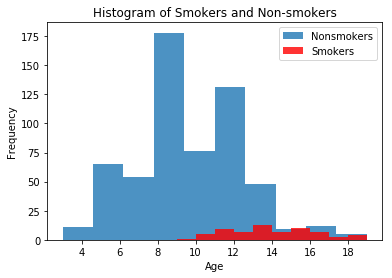

In [28]:
# Exercise 5
plt.hist(nonsmokers_age, alpha=0.8, label='Nonsmokers')
plt.hist(smokers_age, alpha=0.8, color = "red", label = 'Smokers')
plt.title('Histogram of Smokers and Non-smokers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

The Non-smoker group has a much younger age range than the smoker group, and since since smaller children will have a smaller lung capacity, the lower FEV1 values make sense